# Thesis Codes  by Korkut Anapa

# DW AWASH INTELLIGENT CLEANING CYCLE DESIGNER

## Optimization Model
Create a software that can design a cycle according to customer preferences

In [8]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import StackingRegressor
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.compose import make_column_selector as selector
import matplotlib as mpl
import matplotlib.pyplot as plt


In [9]:
df_ref = pd.read_excel('D:/THESIS_DATA/ANALYSIS_DATA_THESIS/DB_SO_60.xlsx')

In [10]:
X_ALL=['1OYSum of kapalı' , '1OYSum of SURE' , '1OYSum of CIRC_TIME' , '1OYSum of WI' , '1OYMax of DEVIR',
      '1OYMax of TEMP' , '1OYSum of ALT_C' , '1OYSum of ÜST_C' , '1OYSum of TEPE_C' , '1OYSum of ZONE_C' , '1OYSum of BEKLEME' ,
      '1OYSum of FAN' , '1OYSum of KAPI ACMA' , '1OYSum of FAN / KLAPE' , '1OYSum of GAUDI_offset' ,
      '1OYSum of GAUDI_nonoffset' , '2AYSum of kapalı' , '2AYSum of SURE' , '2AYSum of CIRC_TIME' , '2AYSum of WI' ,
      '2AYMax of DEVIR' , '2AYMax of TEMP' , '2AYSum of ALT_C' , '2AYSum of ÜST_C' , '2AYSum of TEPE_C' , '2AYSum of ZONE_C' , 
      '2AYSum of BEKLEME' , '2AYSum of FAN' , '2AYSum of KAPI ACMA' , '2AYSum of FAN / KLAPE' , '2AYSum of GAUDI_offset' , 
      '2AYSum of GAUDI_nonoffset' , '3MFTSum of kapalı' , '3MFTSum of SURE' , '3MFTSum of CIRC_TIME' , '3MFTSum of WI' ,
      '3MFTMax of DEVIR' , '3MFTMax of TEMP' , '3MFTSum of ALT_C' , '3MFTSum of ÜST_C' , '3MFTSum of TEPE_C' , 
      '3MFTSum of ZONE_C' , '3MFTSum of BEKLEME' , '3MFTSum of FAN', '3MFTSum of KAPI ACMA' , '3MFTSum of FAN / KLAPE' , 
      '3MFTSum of GAUDI_offset' , '3MFTSum of GAUDI_nonoffset' , '4SGDSum of kapalı' , '4SGDSum of SURE' , 
      '4SGDSum of CIRC_TIME', '4SGDSum of WI' , '4SGDMax of DEVIR' , '4SGDMax of TEMP' , '4SGDSum of ALT_C' , 
      '4SGDSum of ÜST_C' , '4SGDSum of TEPE_C' , '4SGDSum of ZONE_C' , '4SGDSum of BEKLEME' , '4SGDSum of FAN' , 
      '4SGDSum of KAPI ACMA' , '4SGDSum of FAN / KLAPE' , '4SGDSum of GAUDI_offset' , '4SGDSum of GAUDI_nonoffset' , 
      '5ERSum of kapalı' , '5ERSum of SURE' , '5ERSum of CIRC_TIME' , '5ERSum of WI' , '5ERMax of DEVIR' , '5ERMax of TEMP' ,
      '5ERSum of ALT_C' , '5ERSum of ÜST_C' , '5ERSum of TEPE_C' , '5ERSum of ZONE_C' , '5ERSum of BEKLEME' ,
      '5ERSum of FAN' , '5ERSum of KAPI ACMA' , '5ERSum of FAN / KLAPE' , '5ERSum of GAUDI_offset' , 
      '5ERSum of GAUDI_nonoffset' , '6SCD1Sum of kapalı' , '6SCD1Sum of SURE' , '6SCD1Sum of CIRC_TIME' , '6SCD1Sum of WI' , 
      '6SCD1Max of DEVIR' , '6SCD1Max of TEMP' , '6SCD1Sum of ALT_C' , '6SCD1Sum of ÜST_C' , '6SCD1Sum of TEPE_C' , 
      '6SCD1Sum of ZONE_C' , '6SCD1Sum of BEKLEME' , '6SCD1Sum of FAN' , '6SCD1Sum of KAPI ACMA' , '6SCD1Sum of FAN / KLAPE' ,
      '6SCD1Sum of GAUDI_offset' , '6SCD1Sum of GAUDI_nonoffset' , '7SCD2Sum of kapalı' , '7SCD2Sum of SURE' , 
      '7SCD2Sum of CIRC_TIME' , '7SCD2Sum of WI' , '7SCD2Max of DEVIR' , '7SCD2Max of TEMP' , '7SCD2Sum of ALT_C' , 
      '7SCD2Sum of ÜST_C' , '7SCD2Sum of TEPE_C' , '7SCD2Sum of ZONE_C' , '7SCD2Sum of BEKLEME' , '7SCD2Sum of FAN' , 
      '7SCD2Sum of KAPI ACMA' , '7SCD2Sum of FAN / KLAPE' , '7SCD2Sum of GAUDI_offset' , '7SCD2Sum of GAUDI_nonoffset' , 
      '8DSBSum of kapalı' , '8DSBSum of SURE' , '8DSBSum of CIRC_TIME' , '8DSBSum of WI' , '8DSBMax of DEVIR' , 
      '8DSBMax of TEMP' , '8DSBSum of ALT_C' , '8DSBSum of ÜST_C', '8DSBSum of TEPE_C' , '8DSBSum of ZONE_C' ,
      '8DSBSum of BEKLEME' , '8DSBSum of FAN' , '8DSBSum of KAPI ACMA' , '8DSBSum of FAN / KLAPE' , '8DSBSum of GAUDI_offset' ,
      '8DSBSum of GAUDI_nonoffset', '9RYSum of kapalı' , '9RYSum of SURE' , '9RYSum of CIRC_TIME' , '9RYSum of WI' , 
      '9RYMax of DEVIR' , '9RYMax of TEMP' , '9RYSum of ALT_C' , '9RYSum of ÜST_C', '9RYSum of TEPE_C' , '9RYSum of ZONE_C' ,
      '9RYSum of BEKLEME' , '9RYSum of FAN' , '9RYSum of KAPI ACMA' , '9RYSum of FAN / KLAPE' , '9RYSum of GAUDI_offset' ,
      '9RYSum of GAUDI_nonoffset' , '10KUSum of kapalı' , '10KUSum of SURE' , '10KUSum of CIRC_TIME' , '10KUSum of WI' , 
      '10KUMax of DEVIR' , '10KUMax of TEMP' , '10KUSum of ALT_C' , '10KUSum of ÜST_C', '10KUSum of TEPE_C' ,
      '10KUSum of ZONE_C' , '10KUSum of BEKLEME' , '10KUSum of FAN' , '10KUSum of KAPI ACMA' , '10KUSum of FAN / KLAPE' ,
      '10KUSum of GAUDI_offset', '10KUSum of GAUDI_nonoffset']

In [11]:
df=df_ref[X_ALL]

In [12]:
df

,1OYSum of kapalı,1OYSum of SURE,1OYSum of CIRC_TIME,1OYSum of WI,1OYMax of DEVIR,1OYMax of TEMP,1OYSum of ALT_C,1OYSum of ÜST_C,1OYSum of TEPE_C,1OYSum of ZONE_C,...,10KUSum of ALT_C,10KUSum of ÜST_C,10KUSum of TEPE_C,10KUSum of ZONE_C,10KUSum of BEKLEME,10KUSum of FAN,10KUSum of KAPI ACMA,10KUSum of FAN / KLAPE,10KUSum of GAUDI_offset,10KUSum of GAUDI_nonoffset
0,0,24,21,4.0,2800,0,7.4,8.4,5.2,0,...,0,0,0,0,10,78,1,0,0,0
1,0,21,18,4.0,3000,0,7.0,7.0,4.0,0,...,0,0,0,0,10,93,0,0,0,0
2,0,21,18,4.0,3000,0,7.0,7.0,4.0,0,...,0,0,0,0,10,93,0,0,0,0
3,2,48,43,4.8,2800,53,14.6,18.6,7.8,0,...,0,0,0,0,50,57,1,30,0,0
4,3,49,44,4.8,2800,55,14.6,18.6,7.8,0,...,0,0,0,0,30,63,1,29,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0,23,20,4.6,2800,0,20.0,20.0,0.0,0,...,0,0,0,0,102,0,0,0,0,0
150,0,19,16,4.0,2800,0,6.6,5.6,3.8,0,...,0,0,0,0,20,73,0,0,0,0
151,0,8,6,3.5,2800,0,6.0,6.0,0.0,0,...,0,0,0,0,123,0,0,0,0,0
152,0,19,16,4.0,2800,0,6.5,5.5,4.0,0,...,0,0,0,0,10,98,0,37,0,0


In [13]:
y_CPI = df_ref['CPI']
y_DPI = df_ref['DPI']
y_EC_D =df_ref['EC']
y_T_D =df_ref['T']

In [14]:
y_CPI.describe()

count    154.000000
mean       3.287778
std        0.226735
min        2.290000
25%        3.274000
50%        3.327080
75%        3.370500
max        3.580000
Name: CPI, dtype: float64

In [15]:
y_DPI.describe()

count    154.000000
mean      79.913332
std       15.151414
min       15.000000
25%       81.000000
50%       84.000000
75%       86.095376
max       92.301325
Name: DPI, dtype: float64

In [16]:
y_EC_D.describe()

count    154.000000
mean       0.874302
std        0.149146
min        0.500000
25%        0.800500
50%        0.856667
75%        0.949250
max        1.220000
Name: EC, dtype: float64

In [17]:
y_T_D.describe()

count    154.000000
mean     206.053301
std       66.297071
min       30.000000
25%      205.000000
50%      227.333333
75%      243.562500
max      297.000000
Name: T, dtype: float64

In [18]:
X_FS=['1OYSum of kapalı', '1OYSum of SURE', '1OYSum of CIRC_TIME',
       '1OYSum of WI', '1OYMax of DEVIR', '1OYMax of TEMP', '1OYSum of ALT_C',
       '1OYSum of TEPE_C', '1OYSum of BEKLEME', '2AYSum of kapalı',
       '2AYSum of SURE', '2AYSum of WI', '2AYMax of DEVIR', '2AYMax of TEMP',
       '2AYSum of ALT_C', '2AYSum of TEPE_C', '3MFTSum of SURE',
       '4SGDSum of SURE', '4SGDSum of WI', '4SGDMax of DEVIR',
       '4SGDSum of ALT_C', '4SGDSum of ÜST_C', '4SGDSum of TEPE_C',
       '7SCD2Sum of kapalı', '7SCD2Sum of SURE', '7SCD2Max of DEVIR',
       '7SCD2Max of TEMP', '7SCD2Sum of ALT_C', '7SCD2Sum of ÜST_C',
       '8DSBSum of kapalı', '8DSBMax of DEVIR', '10KUSum of SURE',
       '10KUSum of BEKLEME', '10KUSum of FAN', '10KUSum of KAPI ACMA',
       '10KUSum of FAN / KLAPE', '10KUSum of GAUDI_offset']

In [19]:
X_DE=[ '1OYSum of SURE', '1OYSum of CIRC_TIME',
       '1OYSum of WI', '1OYMax of DEVIR', '1OYMax of TEMP', '1OYSum of ALT_C',
       '1OYSum of ÜST_C', '1OYSum of TEPE_C', '1OYSum of BEKLEME',
       '2AYSum of SURE', '2AYSum of CIRC_TIME', '2AYSum of WI',
       '2AYMax of DEVIR', '2AYMax of TEMP', '2AYSum of ALT_C',
       '2AYSum of ÜST_C',  '4SGDSum of SURE',
       '4SGDSum of CIRC_TIME', '4SGDSum of WI', '4SGDMax of DEVIR',
       '4SGDSum of ALT_C', '4SGDSum of ÜST_C', '4SGDSum of TEPE_C',
       '7SCD2Sum of kapalı', '7SCD2Sum of SURE', '7SCD2Sum of CIRC_TIME',
       '7SCD2Sum of WI', '7SCD2Max of DEVIR', '7SCD2Max of TEMP',
       '7SCD2Sum of ALT_C', '7SCD2Sum of ÜST_C', '7SCD2Sum of TEPE_C',
       '10KUSum of SURE', '10KUSum of BEKLEME', '10KUSum of FAN',
       '10KUSum of KAPI ACMA', '10KUSum of FAN / KLAPE']

In [20]:
df_ver_3=df_ref[X_DE]

In [21]:
df_ver_3

,1OYSum of SURE,1OYSum of CIRC_TIME,1OYSum of WI,1OYMax of DEVIR,1OYMax of TEMP,1OYSum of ALT_C,1OYSum of ÜST_C,1OYSum of TEPE_C,1OYSum of BEKLEME,2AYSum of SURE,...,7SCD2Max of DEVIR,7SCD2Max of TEMP,7SCD2Sum of ALT_C,7SCD2Sum of ÜST_C,7SCD2Sum of TEPE_C,10KUSum of SURE,10KUSum of BEKLEME,10KUSum of FAN,10KUSum of KAPI ACMA,10KUSum of FAN / KLAPE
0,24,21,4.0,2800,0,7.4,8.4,5.2,0,83,...,2800,48,9.0,5.0,6.0,90,10,78,1,0
1,21,18,4.0,3000,0,7.0,7.0,4.0,0,77,...,2800,53,11.0,8.0,11.0,104,10,93,0,0
2,21,18,4.0,3000,0,7.0,7.0,4.0,0,77,...,2800,53,11.0,8.0,11.0,104,10,93,0,0
3,48,43,4.8,2800,53,14.6,18.6,7.8,2,70,...,2600,56,4.5,5.5,6.0,110,50,57,1,30
4,49,44,4.8,2800,55,14.6,18.6,7.8,2,83,...,2600,53,3.5,5.5,5.0,96,30,63,1,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,23,20,4.6,2800,0,20.0,20.0,0.0,0,67,...,2600,59,24.0,24.0,0.0,103,102,0,0,0
150,19,16,4.0,2800,0,6.6,5.6,3.8,0,68,...,2600,59,12.0,8.0,6.0,94,20,73,0,0
151,8,6,3.5,2800,0,6.0,6.0,0.0,0,59,...,2800,60,11.0,11.0,0.0,124,123,0,0,0
152,19,16,4.0,2800,0,6.5,5.5,4.0,0,67,...,2600,51,8.0,7.0,4.0,109,10,98,0,37


# Optimization 

Create X to optimize

In [22]:
X=df_ver_3

In [23]:
variables=X.columns

In [24]:
outputs = [ y_CPI, y_DPI , y_EC_D, y_T_D]

In [27]:
model = XGBRegressor(n_estimators=100, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
for y in outputs:
    model.fit(X, y)
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=79)
    scores1 = cross_val_score(model,X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    scores3 = cross_val_score(model,X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
    print(' %.3f %.0f' % (-mean(scores1), 100*mean(scores3)))

 0.046 73
 2.241 86
 0.035 87
 4.350 99


### models

In [19]:
y = y_CPI
model_XGB_CPI = XGBRegressor(n_estimators=100, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model_XGB_CPI.fit(X, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=101)
scores1 = cross_val_score(model_XGB_CPI,X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_XGB_CPI,X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1), 100*mean(scores3)))

 0.046 82


In [20]:
y = y_DPI
model_XGB_DPI = XGBRegressor(n_estimators=100, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model_XGB_DPI.fit(X, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=101)
scores1 = cross_val_score(model_XGB_DPI,X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_XGB_DPI,X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1), 100*mean(scores3)))

 2.266 91


In [21]:
y = y_EC_D
model_XGB_EC = XGBRegressor(n_estimators=100, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model_XGB_EC.fit(X, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=101)
scores1 = cross_val_score(model_XGB_EC,X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_XGB_EC,X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1), 100*mean(scores3)))

 0.033 89


In [22]:
y = y_T_D
model_XGB_T = XGBRegressor(n_estimators=100, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model_XGB_T.fit(X, y)
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=101)
scores1 = cross_val_score(model_XGB_T,X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
scores3 = cross_val_score(model_XGB_T,X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
print(' %.3f %.0f' % (-mean(scores1), 100*mean(scores3)))

 4.218 98


# Select base program 
## Design a new Eco program with new targets

In the dataset there are different programs. If we want some other restrictions like water level etc we can use other base programs like water with 6lt etc. 

In [28]:
df_base = pd.read_excel('D:/THESIS_DATA/ANALYSIS_DATA_THESIS/DB_SO_eco.xlsx')

In [29]:
X_base=df_base[variables]

In [30]:
X_base

,1OYSum of SURE,1OYSum of CIRC_TIME,1OYSum of WI,1OYMax of DEVIR,1OYMax of TEMP,1OYSum of ALT_C,1OYSum of ÜST_C,1OYSum of TEPE_C,1OYSum of BEKLEME,2AYSum of SURE,...,7SCD2Max of DEVIR,7SCD2Max of TEMP,7SCD2Sum of ALT_C,7SCD2Sum of ÜST_C,7SCD2Sum of TEPE_C,10KUSum of SURE,10KUSum of BEKLEME,10KUSum of FAN,10KUSum of KAPI ACMA,10KUSum of FAN / KLAPE
0,54,41,4,2800,54,11.0,14.000000,10.000000,10,69,...,2600,53,8,13,6,82,80,0,1,0
1,42,39,4,2800,54,11.0,15.000000,7.000000,0,70,...,2600,53,8,12,8,82,80,0,1,0
2,54,41,4,2800,54,11.0,14.000000,10.000000,10,69,...,2600,53,7,10,7,82,80,0,1,0
3,54,41,4,2800,54,11.0,14.000000,10.000000,10,69,...,2600,53,7,10,7,82,80,0,1,0
4,43,40,4,2800,54,13.5,11.166667,9.333333,0,68,...,2600,53,6,12,6,82,80,0,1,0
5,43,40,4,2800,54,13.5,11.166667,9.333333,0,68,...,2600,53,6,12,6,82,80,0,1,0
6,38,35,4,2800,54,13.0,16.000000,0.000000,0,60,...,2600,53,10,13,3,82,80,0,1,0
7,38,35,4,2800,54,13.0,16.000000,0.000000,0,60,...,2600,53,10,13,3,82,80,0,1,0
8,43,40,4,2800,54,13.5,11.166667,9.333333,0,68,...,2600,53,6,12,6,82,80,0,1,0


In [32]:
xl=[]
xu=[]

In [33]:
X=df_ver_3
for term in X:
    xl.append(0.80*min(X_base[term]))
    xu.append(1.20*max(X_base[term]))

In [27]:
import numpy as np
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.problem import ElementwiseProblem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.optimize import minimize
from pymoo.problems import get_problem
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter
import time

The designer can limit the optimization by changing the xl and xu variables

The designer can also create constraints 

In [28]:
st = time.time()
# create the reference directions to be used for the optimization
ref_dirs = get_reference_directions("das-dennis", 4, n_partitions=12)
# things to do: add constr for water amount and time 
# eco program design 
class MyProblem(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var=37,
                         n_obj=4,
                         n_ieq_constr=0,
                         xl=xl,
                         xu=xu)
    def _evaluate(self, x, out, *args, **kwargs):
            my_array = np.array([[   x[0],   x[1],   x[2],  x[3],   x[4], x[5],  x[6],   x[7],  x[8],  
                                  x[9], x[10], x[11],  x[12], x[13], x[14], x[15], x[16], x[17], x[18],
                                 x[19], x[20], x[21],  x[22], x[23], x[24], x[25], x[26], x[27], x[28],
                                 x[29], x[30], x[31],  x[32], x[33], x[34], x[35], x[36]]], dtype=float)
            df = pd.DataFrame(my_array, columns = variables)
            f1 =  model_XGB_CPI.predict(df)
            f2 =  model_XGB_DPI.predict(df)
            f3 =  model_XGB_EC.predict(df)
            f4 =  model_XGB_T.predict(df)            
            out["F"] = [-f1, -f2, f3, f4]

problem = MyProblem()

algorithm = NSGA3(pop_size=500,
                  ref_dirs=ref_dirs)

res = minimize(problem,
               algorithm,
               seed=1,
               termination=('n_gen', 50))
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 782.8425893783569 seconds


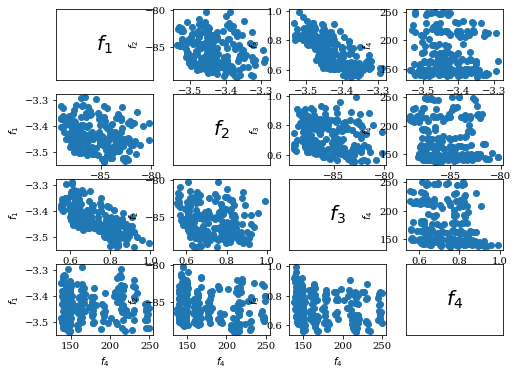

In [29]:
X = res.X
F = res.F
Scatter().add(res.F).show()

In [30]:
F = res.F
xl, xu = problem.bounds()
fl = F.min(axis=0)
fu = F.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")
print(f"Scale f3: [{fl[2]}, {fu[2]}]")
print(f"Scale f4: [{fl[3]}, {fu[3]}]")

Scale f1: [-3.5359532833099365, -3.2881574630737305]
Scale f2: [-88.97337341308594, -80.24964904785156]
Scale f3: [0.5536431670188904, 0.9932116866111755]
Scale f4: [137.42343139648438, 249.30210876464844]


In [31]:
approx_ideal = F.min(axis=0)
approx_nadir = F.max(axis=0)
nF = (F - approx_ideal) / (approx_nadir - approx_ideal)

fl = nF.min(axis=0)
fu = nF.max(axis=0)

In [32]:
weights = np.array([0.01,0.01,0.97,0.01])

In [33]:
from pymoo.decomposition.asf import ASF

decomp = ASF()

In [34]:
i = decomp.do(nF, 1/weights).argmin()

Best regarding ASF: Point 
i = 148
F = [ -3.37532067 -83.01264954   0.55364317 216.68811035]


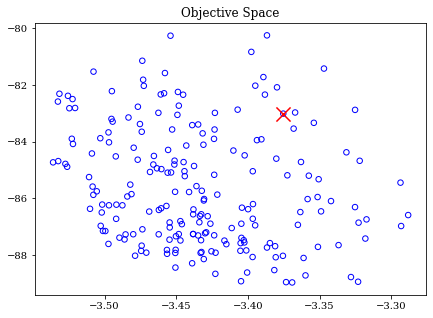

In [35]:
print("Best regarding ASF: Point \ni = %s\nF = %s" % (i, F[i]))
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(F[i, 0], F[i, 1], marker="x", color="red", s=200)
plt.title("Objective Space")
plt.show()

In [36]:
X[i]

array([3.77921110e+01, 3.64650400e+01, 4.73014482e+00, 3.03403427e+03,
       5.61118639e+01, 1.37976470e+01, 1.44626179e+01, 1.06366898e+01,
       7.73508877e+00, 6.01824281e+01, 4.99783142e+01, 0.00000000e+00,
       2.29201233e+03, 4.85980191e+01, 3.51099014e+01, 3.28821603e+01,
       1.79486565e+01, 7.72032602e+00, 2.70076370e+00, 3.02509123e+03,
       4.38288979e+00, 4.78860398e+00, 3.12776618e+00, 4.24090127e+00,
       2.80743409e+01, 2.88086970e+01, 2.59085608e+00, 3.10945314e+03,
       4.30097681e+01, 5.13280206e+00, 8.83329911e+00, 4.12683148e+00,
       8.12971703e+01, 7.26057113e+01, 0.00000000e+00, 9.98517469e-01,
       0.00000000e+00])

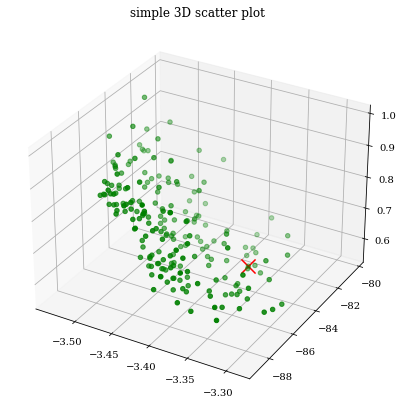

In [37]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(F[:, 0], F[:, 1], F[:, 2], color = "green")
ax.scatter3D(F[i, 0], F[i, 1], F[i, 2], marker="x", color="red", s=200)
plt.title("simple 3D scatter plot")

# show plot
plt.show()

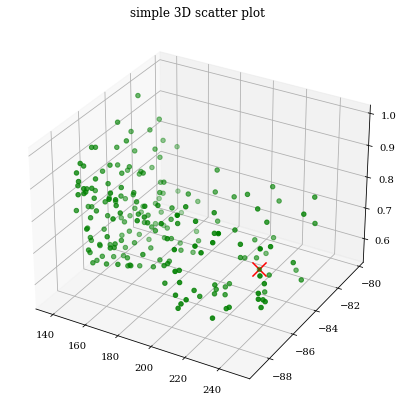

In [38]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(F[:, 3], F[:, 1], F[:, 2], color = "green")
ax.scatter3D(F[i, 3], F[i, 1], F[i, 2], marker="x", color="red", s=200)
plt.title("simple 3D scatter plot")

# show plot
plt.show()

This is an ECO program with F = [ -3.36683893 -82.14516449   0.5411337  216.16137695] 
the parameters are 
    [4.61746304e+01, 4.67236109e+01, 5.34554775e+00, 1.73154180e+03,
       5.73314537e+01, 2.12771537e+01, 2.10852574e+01, 1.08511382e+01,
       2.44368643e+01, 5.79464099e+01, 4.90169037e+01, 3.61641574e+00,
       2.36377830e+03, 4.42757032e+01, 5.24938690e+01, 3.89711341e+01,
       9.84624901e+00, 7.31743498e+00, 2.86978294e+00, 2.93348692e+03,
       3.70094032e+00, 4.03328888e+00, 3.21313600e+00, 3.24355199e+00,
       1.84448442e+01, 2.90232427e+01, 3.10792134e+00, 2.42365654e+03,
       5.26022582e+01, 3.87194302e+00, 2.24385636e+01, 1.50076083e+00,
       9.24961623e+01, 1.04702611e+02, 5.49426787e+00, 9.82814647e-01,
       1.06571896e+01] in DE dataset

## Problem 2 optimize the intensive program according to customer preferences

In [40]:
df_base = pd.read_excel('D:/THESIS_DATA/ANALYSIS_DATA_THESIS/DB_SO_intensive.xlsx')

In [41]:
X_base=df_base[variables]

In [42]:
xl=[]
xu=[]

In [43]:
X=df_ver_3
for term in X:
    xl.append(0.85*min(X_base[term]))
    xu.append(1.15*max(X_base[term]))

In [44]:
import numpy as np
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.problem import ElementwiseProblem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.optimize import minimize
from pymoo.problems import get_problem
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter
import time

The designer can limit the optimization by changing the xl and xu variables

The designer can also create constraints 

In [45]:
st = time.time()
# create the reference directions to be used for the optimization
ref_dirs = get_reference_directions("das-dennis", 4, n_partitions=12)
# things to do: add constr for water amount and time 
# eco program design 
class MyProblem(ElementwiseProblem):
    def __init__(self):
        super().__init__(n_var=37,
                         n_obj=4,
                         n_ieq_constr=0,
                         xl=xl,
                         xu=xu)
    def _evaluate(self, x, out, *args, **kwargs):
            my_array = np.array([[   x[0],   x[1],   x[2],  x[3],   x[4], x[5],  x[6],   x[7],  x[8],  
                                  x[9], x[10], x[11],  x[12], x[13], x[14], x[15], x[16], x[17], x[18],
                                 x[19], x[20], x[21],  x[22], x[23], x[24], x[25], x[26], x[27], x[28],
                                 x[29], x[30], x[31],  x[32], x[33], x[34], x[35], x[36]]], dtype=float)
            df = pd.DataFrame(my_array, columns = variables)
            f1 =  model_XGB_CPI.predict(df)
            f2 =  model_XGB_DPI.predict(df)
            f3 =  model_XGB_EC.predict(df)
            f4 =  model_XGB_T.predict(df)            
            out["F"] = [-f1, -f2, f3, f4]

problem = MyProblem()

algorithm = NSGA3(pop_size=500,
                  ref_dirs=ref_dirs)

res = minimize(problem,
               algorithm,
               seed=1,
               termination=('n_gen', 50))
et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 846.9448997974396 seconds


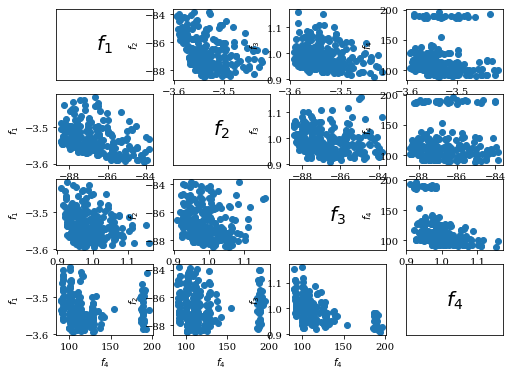

In [46]:
X = res.X
F = res.F
Scatter().add(res.F).show()

In [47]:
F = res.F
xl, xu = problem.bounds()
fl = F.min(axis=0)
fu = F.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")
print(f"Scale f3: [{fl[2]}, {fu[2]}]")
print(f"Scale f4: [{fl[3]}, {fu[3]}]")

Scale f1: [-3.593400478363037, -3.4183950424194336]
Scale f2: [-88.44851684570312, -83.8441162109375]
Scale f3: [0.910064697265625, 1.1588352918624878]
Scale f4: [89.29470825195312, 196.15383911132812]


In [32]:
approx_ideal = F.min(axis=0)
approx_nadir = F.max(axis=0)
nF = (F - approx_ideal) / (approx_nadir - approx_ideal)

fl = nF.min(axis=0)
fu = nF.max(axis=0)

In [72]:
weights = np.array([0.01,0.01,0.97,0.01])

In [73]:
from pymoo.decomposition.asf import ASF

decomp = ASF()

In [74]:
i = decomp.do(nF, 1/weights).argmin()

Best regarding ASF: Point 
i = 23
F = [ -3.49770617 -87.42541504   0.98333257 100.86274719]


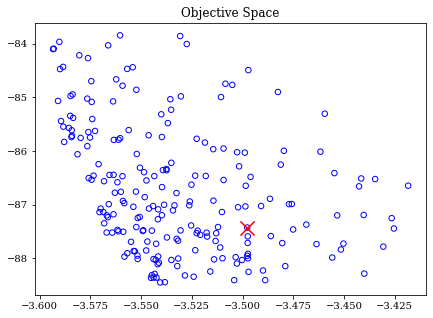

In [75]:
print("Best regarding ASF: Point \ni = %s\nF = %s" % (i, F[i]))
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(F[i, 0], F[i, 1], marker="x", color="red", s=200)
plt.title("Objective Space")
plt.show()

In [76]:
X[i]

array([2.05686100e+01, 1.86905724e+01, 5.16414933e+00, 2.54570204e+03,
       5.21786693e+01, 2.36328903e+01, 1.78552417e+01, 0.00000000e+00,
       0.00000000e+00, 3.08888081e+01, 2.72027414e+01, 3.65870089e+00,
       3.16472663e+03, 6.24482123e+01, 4.44626067e+01, 4.60994103e+01,
       6.05701387e+00, 4.59653181e+00, 2.89920777e+00, 2.81218235e+03,
       5.21674367e+00, 4.72493599e+00, 0.00000000e+00, 0.00000000e+00,
       9.90883978e+00, 1.93509261e+01, 3.03145618e+00, 2.24876156e+03,
       5.69579255e+01, 1.54142411e+01, 8.13947771e+00, 0.00000000e+00,
       4.06279379e+01, 1.76406989e+01, 1.33546765e+00, 0.00000000e+00,
       0.00000000e+00])

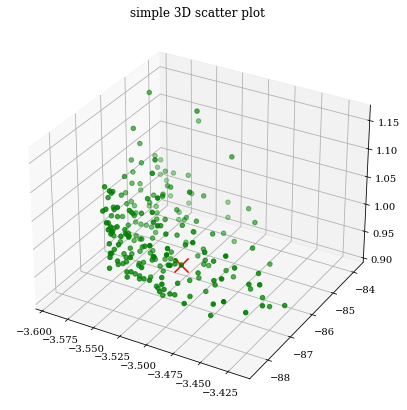

In [77]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(F[:, 0], F[:, 1], F[:, 2], color = "green")
ax.scatter3D(F[i, 0], F[i, 1], F[i, 2], marker="x", color="red", s=200)
plt.title("simple 3D scatter plot")

# show plot
plt.show()

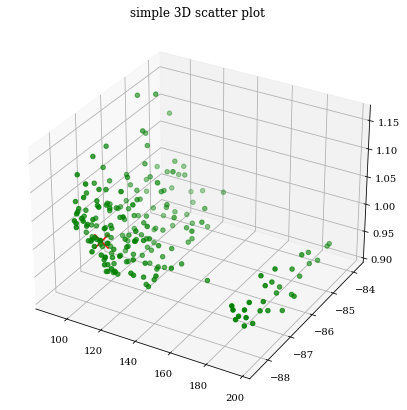

In [78]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

# Creating plot
ax.scatter3D(F[:, 3], F[:, 1], F[:, 2], color = "green")
ax.scatter3D(F[i, 3], F[i, 1], F[i, 2], marker="x", color="red", s=200)
plt.title("simple 3D scatter plot")

# show plot
plt.show()

This is an INTENSIVE  program with F = [ -3.49770617 -87.42541504   0.98333257 100.86274719]
the parameters are 
    [2.05686100e+01, 1.86905724e+01, 5.16414933e+00, 2.54570204e+03,
       5.21786693e+01, 2.36328903e+01, 1.78552417e+01, 0.00000000e+00,
       0.00000000e+00, 3.08888081e+01, 2.72027414e+01, 3.65870089e+00,
       3.16472663e+03, 6.24482123e+01, 4.44626067e+01, 4.60994103e+01,
       6.05701387e+00, 4.59653181e+00, 2.89920777e+00, 2.81218235e+03,
       5.21674367e+00, 4.72493599e+00, 0.00000000e+00, 0.00000000e+00,
       9.90883978e+00, 1.93509261e+01, 3.03145618e+00, 2.24876156e+03,
       5.69579255e+01, 1.54142411e+01, 8.13947771e+00, 0.00000000e+00,
       4.06279379e+01, 1.76406989e+01, 1.33546765e+00, 0.00000000e+00,
       0.00000000e+00] in DE dataset

In [7]:
3**40

12157665459056928801